# Importing Necessay Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.initializers import HeNormal,HeUniform

# Importing Dataset

In [3]:
df=pd.read_csv("data/Admission_Predict_Ver1.1.csv")

In [4]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


# EDA

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.drop(['Serial No.'],axis=1,inplace=True)
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [7]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [10]:
cat_columns=df.columns[df.dtypes=='object']
print(cat_columns )

Index([], dtype='object')


<Axes: >

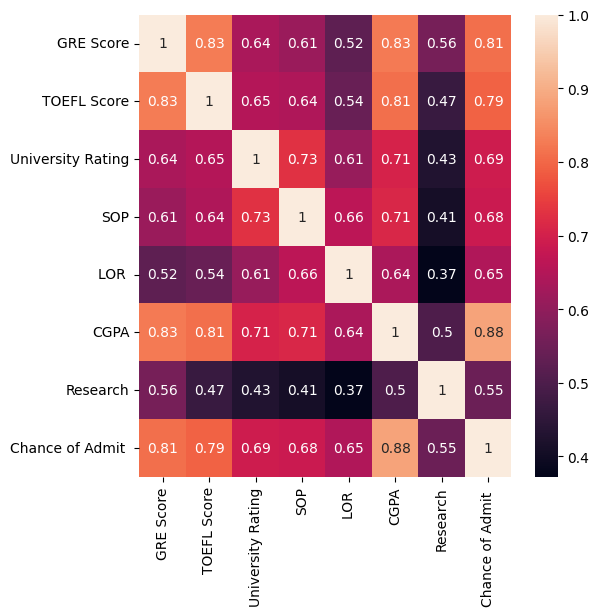

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df.corr(),annot=True)

# Preparing X and y variables

In [12]:
X=df.drop(['Chance of Admit '],axis=1)
y=df['Chance of Admit ']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)
X_train.shape, X_test.shape

((400, 7), (100, 7))

In [14]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
342,308,106,3,3.0,3.0,8.24,0
359,321,107,2,2.0,1.5,8.44,0
109,304,103,5,5.0,4.0,8.64,0
50,313,98,3,2.5,4.5,8.30,1
452,328,116,4,5.0,3.5,9.60,1
...,...,...,...,...,...,...,...
211,328,110,4,5.0,4.0,9.14,1
67,316,107,2,3.5,3.5,8.64,1
25,340,120,5,4.5,4.5,9.60,1
196,306,105,2,3.0,2.5,8.26,0


In [15]:
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [16]:
X_train

array([[0.36      , 0.5       , 0.5       , ..., 0.5       , 0.38235294,
        0.        ],
       [0.62      , 0.53571429, 0.25      , ..., 0.125     , 0.45588235,
        0.        ],
       [0.28      , 0.39285714, 1.        , ..., 0.75      , 0.52941176,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.875     , 0.88235294,
        1.        ],
       [0.32      , 0.46428571, 0.25      , ..., 0.375     , 0.38970588,
        0.        ],
       [0.6       , 0.67857143, 0.75      , ..., 0.625     , 0.61397059,
        1.        ]])

# Building Model

In [81]:
model=Sequential()

model.add(Dense(7,activation='relu',input_dim=7,kernel_initializer=HeNormal()))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))

In [82]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 7)                 56        
                                                                 
 dense_16 (Dense)            (None, 128)               1024      
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17721 (69.22 KB)
Trainable params: 17721 (69.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
model.compile(loss='huber_loss',optimizer='adam')

In [84]:
history= model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 0.0701 - val_loss: 0.0167
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0202 - val_loss: 0.0072
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.0074
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0058 - val_loss: 0.0053
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0029 - val_loss: 0.0033
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.0031
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 11

In [85]:
y_pred=model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [86]:
r2_score(y_test,y_pred)

0.8162283282956088

<Figure size 800x500 with 0 Axes>

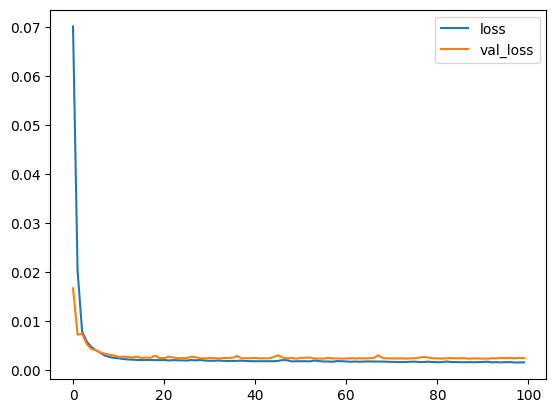

In [87]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# Prediction

In [89]:
#Chnage your input Data Here
input_data=(317,104,3,4.5,3.5,8.6,1)

arr=np.asarray(input_data)
arr=arr.reshape(1,-1)

In [90]:
inp_data=scalar.transform(arr)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [91]:
prediction=model.predict(inp_data)

1/1 [==============================] - 0s 105ms/step


In [100]:
print("Chance of admission: ",round(prediction[0][0]*100,2),"%")

Chance of admission:  75.85 %
